In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving financial sentiment analysis.csv to financial sentiment analysis (2).csv


In [ ]:
df = pd.read_csv('financial sentiment analysis.csv')

In [ ]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df.isnull().sum()

,0
Sentence,0
Sentiment,0


In [ ]:
df.duplicated().sum()

np.int64(6)

In [ ]:
df=df.drop_duplicates()

<ipython-input-9-3bce40c58669>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment",data=df,palette="Set2")


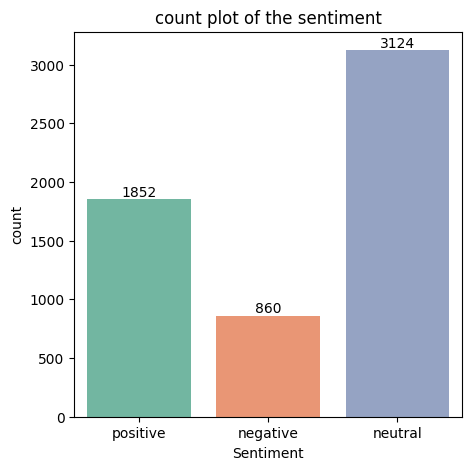

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="Sentiment",data=df,palette="Set2")
plt.title("count plot of the sentiment")

# Adding data labels on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height, str(int(height)), ha='center', va='bottom')

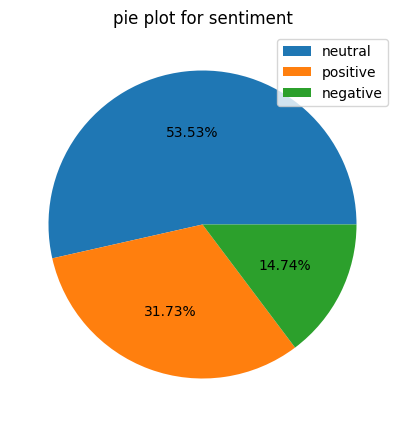

In [ ]:
labels=["neutral","positive","negative"]
plt.figure(figsize=(5,5))
plt.pie(x=df["Sentiment"].value_counts(),autopct="%0.2f%%")
plt.title("pie plot for sentiment")
plt.legend(labels)

In [ ]:
#applying label encoding to sentiment column
le=LabelEncoder()
df["Sentiment"]=le.fit_transform(df["Sentiment"])

df["Sentiment"].unique()

array([2, 0, 1])

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#cleaning

stop=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would",text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = re.sub(r"[^\w\s]"," ",text.lower())
    text = re.sub(r"\s+"," ",text)
    tokens=word_tokenize(text)
    output=[lemmatizer.lemmatize(words) for words in tokens if words.isalpha() and words not in stop]
    return " ".join(output)



In [ ]:
df["clean text"]=df["Sentence"].apply(clean_text)

In [ ]:
df.head()

,Sentence,Sentiment,clean text
0,The GeoSolutions technology will leverage Bene...,2,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",2,last quarter componenta net sale doubled eur e...
3,According to the Finnish-Russian Chamber of Co...,1,according finnish russian chamber commerce maj...
4,The Swedish buyout firm has sold its remaining...,1,swedish buyout firm sold remaining percent sta...


In [ ]:
#Creating the Bag of Words model (BoW)
#countvectorizer

vectorizer=CountVectorizer()
x=vectorizer.fit_transform(df["clean text"])
y=df["Sentiment"]

In [ ]:
#balnce the sentiment column

smote=SMOTE()

x,y=smote.fit_resample(x,y)

print(y.value_counts())

Sentiment
2    3124
0    3124
1    3124
Name: count, dtype: int64


In [ ]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

models={"LogisticRegression":LogisticRegression(),
        "Naive Bayes":MultinomialNB(),
        "SVC":SVC(),
        "KNN":KNeighborsClassifier(),
        "xgboost":XGBClassifier()}

In [ ]:
for name, model in models.items():
    if name=="Naive Bayes":
        model.fit(x_train.toarray(),y_train)
        y_pred_train=model.predict(x_train.toarray())
        y_pred=model.predict(x_test.toarray())

    else:
        model.fit(x_train,y_train)
        y_pred_train=model.predict(x_train)
        y_pred=model.predict(x_test)

    print(f"{name}")
    print("train accuracy: ",accuracy_score(y_train,y_pred_train))
    print("test accuracy: ",accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print("*"*50)

LogisticRegression
train accuracy:  0.851140456182473
test accuracy:  0.6810666666666667
              precision    recall  f1-score   support

           0       0.60      0.83      0.70       623
           1       0.76      0.65      0.70       642
           2       0.73      0.56      0.64       610

    accuracy                           0.68      1875
   macro avg       0.70      0.68      0.68      1875
weighted avg       0.70      0.68      0.68      1875

[[516  68  39]
 [136 418  88]
 [202  65 343]]
**************************************************
Naive Bayes
train accuracy:  0.7288248632786448
test accuracy:  0.6304
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       623
           1       0.76      0.74      0.75       642
           2       0.56      0.65      0.60       610

    accuracy                           0.63      1875
   macro avg       0.63      0.63      0.63      1875
weighted avg       0.63      0.63   

In [ ]:
#TF_IDF vectorizer
tfvectorizer=TfidfVectorizer()
x=tfvectorizer.fit_transform(df["clean text"])
y=df["Sentiment"]

In [ ]:
#balnce the sentiment column

smote=SMOTE()

x,y=smote.fit_resample(x,y)

print(y.value_counts())

Sentiment
2    3124
0    3124
1    3124
Name: count, dtype: int64


In [ ]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

models={"LogisticRegression":LogisticRegression(),
        "Naive Bayes":MultinomialNB(),
        "SVC":SVC(),
        "KNN":KNeighborsClassifier(),
        "xgboost":XGBClassifier()}

In [ ]:
for name, model in models.items():
    if name=="Naive Bayes":
        model.fit(x_train.toarray(),y_train)
        y_pred_train=model.predict(x_train.toarray())
        y_pred=model.predict(x_test.toarray())

    else:
        model.fit(x_train,y_train)
        y_pred_train=model.predict(x_train)
        y_pred=model.predict(x_test)

    print(f"{name}")
    print("train accuracy: ",accuracy_score(y_train,y_pred_train))
    print("test accuracy: ",accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print("*"*50)

LogisticRegression
train accuracy:  0.8950246765372816
test accuracy:  0.8224
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.81      0.74      0.78       642
           2       0.86      0.83      0.85       610

    accuracy                           0.82      1875
   macro avg       0.82      0.82      0.82      1875
weighted avg       0.82      0.82      0.82      1875

[[557  44  22]
 [104 478  60]
 [ 37  66 507]]
**************************************************
Naive Bayes
train accuracy:  0.8578097905828999
test accuracy:  0.7925333333333333
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       623
           1       0.83      0.71      0.76       642
           2       0.85      0.74      0.79       610

    accuracy                           0.79      1875
   macro avg       0.80      0.79      0.79      1875
weighted avg       0.80      0.79  

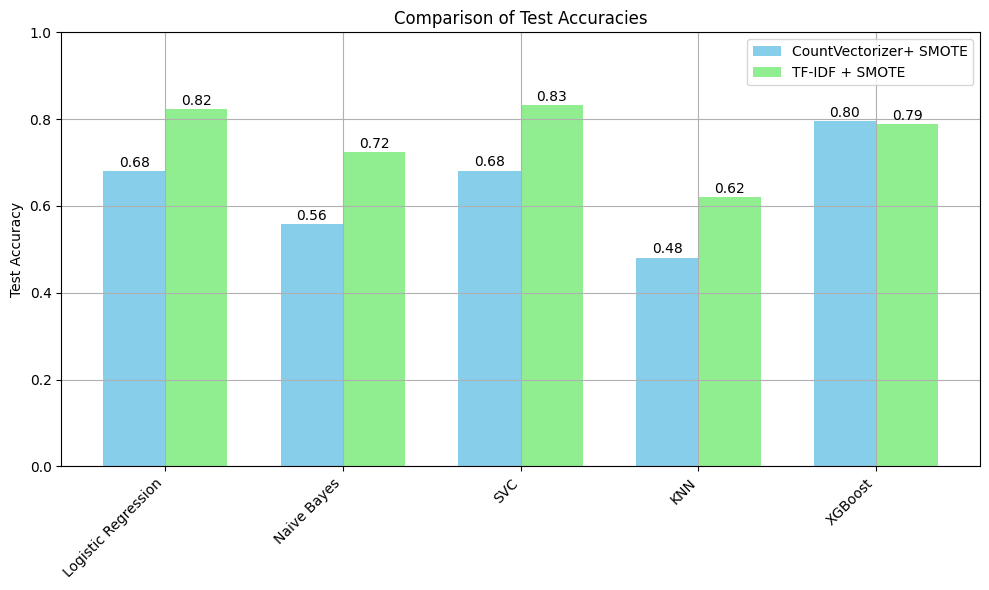

In [ ]:

# Test accuracies from your results (only test accuracies)
countvectorizer_acc = [0.68, 0.5584, 0.6811, 0.4805, 0.7952]  # Logistic, Naive Bayes, SVC, KNN, XGBoost
tfidf_acc = [0.8229, 0.7243, 0.8320, 0.6208, 0.7883]           # Logistic, Naive Bayes, SVC, KNN, XGBoost

models = ['Logistic Regression', 'Naive Bayes', 'SVC', 'KNN', 'XGBoost']

x = np.arange(len(models))  # location of groups
width = 0.35  # width of the bars

# Create the bar plot
plt.figure(figsize=(10,6))

plt.bar(x - width/2, countvectorizer_acc, width, label='CountVectorizer+ SMOTE', color='skyblue')
plt.bar(x + width/2, tfidf_acc, width, label='TF-IDF + SMOTE', color='lightgreen')

plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

# Add numbers on top of bars
for i in range(len(models)):
    plt.text(x[i] - width/2, countvectorizer_acc[i] + 0.01, f"{countvectorizer_acc[i]:.2f}", ha='center')
    plt.text(x[i] + width/2, tfidf_acc[i] + 0.01, f"{tfidf_acc[i]:.2f}", ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Prepare data
data = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVC', 'KNN', 'XGBoost'],
    'CountVectorizer Test Accuracy': [0.68, 0.56, 0.68, 0.48, 0.80],
    'TF-IDF + SMOTE Test Accuracy': [0.82, 0.72, 0.83, 0.62, 0.79]
}

# Create a DataFrame
pd.DataFrame(data)

,Model,CountVectorizer Test Accuracy,TF-IDF + SMOTE Test Accuracy
0,Logistic Regression,0.68,0.82
1,Naive Bayes,0.56,0.72
2,SVC,0.68,0.83
3,KNN,0.48,0.62
4,XGBoost,0.80,0.79


# ***cross validation***


----- Model: LogisticRegression -----
Fold 0 - Precision: 0.6498, Recall: 0.6498
Fold 1 - Precision: 0.6692, Recall: 0.6692
Fold 2 - Precision: 0.6795, Recall: 0.6795
Fold 3 - Precision: 0.6692, Recall: 0.6692
Fold 4 - Precision: 0.6812, Recall: 0.6812

Average Precision for LogisticRegression: 0.6698
Average Recall for LogisticRegression: 0.6698

Classification Report (last fold):
              precision    recall  f1-score   support

           2       0.76      0.67      0.71       370
           0       0.34      0.24      0.28       172
           1       0.70      0.81      0.75       625

    accuracy                           0.68      1167
   macro avg       0.60      0.57      0.58      1167
weighted avg       0.67      0.68      0.67      1167

************************************************************

----- Model: Naive Bayes -----
Fold 0 - Precision: 0.6584, Recall: 0.6584
Fold 1 - Precision: 0.6881, Recall: 0.6881
Fold 2 - Precision: 0.6864, Recall: 0.6864
Fold 3 - Pr

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:29:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 0 - Precision: 0.6618, Recall: 0.6618


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:29:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - Precision: 0.6855, Recall: 0.6855


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:29:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - Precision: 0.6769, Recall: 0.6769


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:29:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - Precision: 0.6787, Recall: 0.6787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:29:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - Precision: 0.6967, Recall: 0.6967

Average Precision for XGBoost: 0.6799
Average Recall for XGBoost: 0.6799

Classification Report (last fold):
              precision    recall  f1-score   support

           2       0.78      0.59      0.67       370
           0       0.49      0.20      0.29       172
           1       0.69      0.90      0.78       625

    accuracy                           0.70      1167
   macro avg       0.65      0.56      0.58      1167
weighted avg       0.69      0.70      0.67      1167

************************************************************


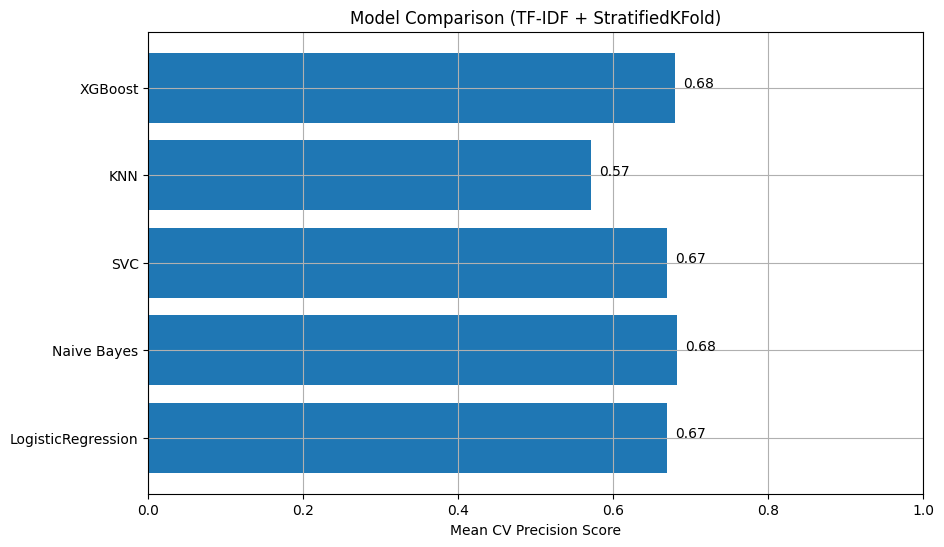

In [ ]:
# cross validation and Count vectorizer

# Shuffle and prepare data
df = df.sample(frac=1).reset_index(drop=True)
df['fold'] = -1

# Set input (text) and target (label)
x = df["clean text"]
y = df['Sentiment']

# 5-Fold setup
n = 5
kf = StratifiedKFold(n_splits=n)

# Assign fold numbers
for k, (train_idx, test_idx) in enumerate(kf.split(x, y)):
    df.loc[test_idx, 'fold'] = k

# Define models
models = {
    "LogisticRegression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Create dictionary to save results
results = {}

# Try each model
for model_name, model_instance in models.items():
    print(f"\n----- Model: {model_name} -----")

    precision_scores = []
    recall_scores = []

    for k in range(n):
        train = df[df.fold != k].reset_index(drop=True)
        test = df[df.fold == k].reset_index(drop=True)

        # Create a fresh TF-IDF vectorizer for every fold
        vectorizer = CountVectorizer()

        # Fit vectorizer only on training text
        vectorizer.fit(train["clean text"])

        # Transform texts into vectors
        x_train = vectorizer.transform(train["clean text"])
        y_train = train["Sentiment"]

        x_test = vectorizer.transform(test["clean text"])
        y_test = test["Sentiment"]

        # Create a new model instance for each fold
        model = model_instance.__class__(**model_instance.get_params())
        model.fit(x_train, y_train)

        # Predict
        preds = model.predict(x_test)

        # Metrics
        precision = precision_score(y_test, preds, average='micro')
        recall = recall_score(y_test, preds, average='micro')

        precision_scores.append(precision)
        recall_scores.append(recall)

        print(f"Fold {k} - Precision: {precision:.4f}, Recall: {recall:.4f}")

    # After all folds, show average scores
    avg_precision = sum(precision_scores) / n
    avg_recall = sum(recall_scores) / n

    print(f"\nAverage Precision for {model_name}: {avg_precision:.4f}")
    print(f"Average Recall for {model_name}: {avg_recall:.4f}")

    # Save average precision for plotting
    results[model_name] = avg_precision

    # Show final classification report (for last fold)
    print("\nClassification Report (last fold):")
    print(classification_report(y_test, preds, labels=[2, 0, 1]))
    print("*" * 60)

# =====================
# Now Plotting Results
# =====================

model_names = list(results.keys())
average_precisions = list(results.values())

plt.figure(figsize=(10,6))
plt.barh(model_names, average_precisions)
plt.xlabel("Mean CV Precision Score")
plt.title("Model Comparison (TF-IDF + StratifiedKFold)")
for index, value in enumerate(average_precisions):
    plt.text(value + 0.01, index, f"{value:.2f}")
plt.xlim(0, 1)
plt.grid(True)
plt.show()


----- Model: LogisticRegression -----
Fold 0 - Precision: 0.6995, Recall: 0.6995
Fold 1 - Precision: 0.6949, Recall: 0.6949
Fold 2 - Precision: 0.6932, Recall: 0.6932
Fold 3 - Precision: 0.6881, Recall: 0.6881
Fold 4 - Precision: 0.7035, Recall: 0.7035

Average Precision for LogisticRegression: 0.6959
Average Recall for LogisticRegression: 0.6959

Classification Report (last fold):
              precision    recall  f1-score   support

           2       0.78      0.63      0.69       371
           0       0.44      0.21      0.28       172
           1       0.70      0.89      0.78       624

    accuracy                           0.70      1167
   macro avg       0.64      0.57      0.59      1167
weighted avg       0.69      0.70      0.68      1167

************************************************************

----- Model: Naive Bayes -----
Fold 0 - Precision: 0.6627, Recall: 0.6627
Fold 1 - Precision: 0.6512, Recall: 0.6512
Fold 2 - Precision: 0.6744, Recall: 0.6744
Fold 3 - Pr

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:30:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 0 - Precision: 0.6721, Recall: 0.6721


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:30:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - Precision: 0.6615, Recall: 0.6615


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:30:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - Precision: 0.6667, Recall: 0.6667


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - Precision: 0.6572, Recall: 0.6572


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - Precision: 0.6632, Recall: 0.6632

Average Precision for XGBoost: 0.6642
Average Recall for XGBoost: 0.6642

Classification Report (last fold):
              precision    recall  f1-score   support

           2       0.80      0.57      0.66       371
           0       0.32      0.22      0.26       172
           1       0.67      0.84      0.75       624

    accuracy                           0.66      1167
   macro avg       0.59      0.54      0.56      1167
weighted avg       0.66      0.66      0.65      1167

************************************************************


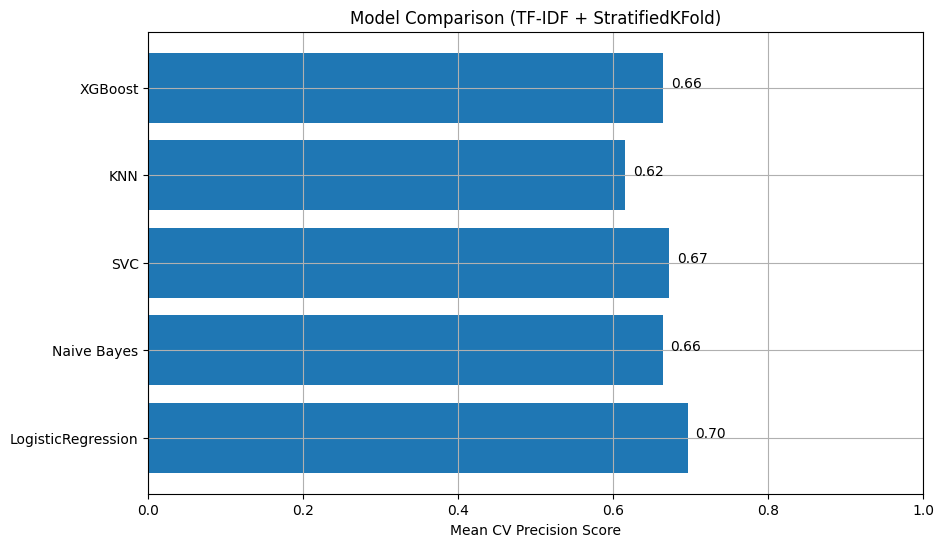

In [ ]:
#cross validation for selected models in TF_IDF vectorizer

# Shuffle and prepare data
df = df.sample(frac=1).reset_index(drop=True)
df['fold'] = -1

# Set input (text) and target (label)
x = df["clean text"]
y = df['Sentiment']

# 5-Fold setup
n = 5
kf = StratifiedKFold(n_splits=n)

# Assign fold numbers
for k, (train_idx, test_idx) in enumerate(kf.split(x, y)):
    df.loc[test_idx, 'fold'] = k

# Define models
models = {
    "LogisticRegression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Create dictionary to save results
results = {}

# Try each model
for model_name, model_instance in models.items():
    print(f"\n----- Model: {model_name} -----")

    precision_scores = []
    recall_scores = []

    for k in range(n):
        train = df[df.fold != k].reset_index(drop=True)
        test = df[df.fold == k].reset_index(drop=True)

        # Create a fresh TF-IDF vectorizer for every fold
        vectorizer = TfidfVectorizer()

        # Fit vectorizer only on training text
        vectorizer.fit(train["clean text"])

        # Transform texts into vectors
        x_train = vectorizer.transform(train["clean text"])
        y_train = train["Sentiment"]

        x_test = vectorizer.transform(test["clean text"])
        y_test = test["Sentiment"]

        # Create a new model instance for each fold
        model = model_instance.__class__(**model_instance.get_params())
        model.fit(x_train, y_train)

        # Predict
        preds = model.predict(x_test)

        # Metrics
        precision = precision_score(y_test, preds, average='micro')
        recall = recall_score(y_test, preds, average='micro')

        precision_scores.append(precision)
        recall_scores.append(recall)

        print(f"Fold {k} - Precision: {precision:.4f}, Recall: {recall:.4f}")

    # After all folds, show average scores
    avg_precision = sum(precision_scores) / n
    avg_recall = sum(recall_scores) / n

    print(f"\nAverage Precision for {model_name}: {avg_precision:.4f}")
    print(f"Average Recall for {model_name}: {avg_recall:.4f}")

    # Save average precision for plotting
    results[model_name] = avg_precision

    # Show final classification report (for last fold)
    print("\nClassification Report (last fold):")
    print(classification_report(y_test, preds, labels=[2, 0, 1]))
    print("*" * 60)

# =====================
# Now Plotting Results
# =====================

model_names = list(results.keys())
average_precisions = list(results.values())

plt.figure(figsize=(10,6))
plt.barh(model_names, average_precisions)
plt.xlabel("Mean CV Precision Score")
plt.title("Model Comparison (TF-IDF + StratifiedKFold)")
for index, value in enumerate(average_precisions):
    plt.text(value + 0.01, index, f"{value:.2f}")
plt.xlim(0, 1)
plt.grid(True)
plt.show()

**Lexicon-Based (VADER, TextBlob)**

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

analyser=SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyser.polarity_scores(str(text))

df["clean text"].apply(get_sentiment)[1]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
#subjectivity and polarity from textblob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
#creating compound,neg, pos and neu
compound=[]
neg=[]
pos=[]
neu=[]

for i in range(0, len(df["clean text"])):
    SIA=get_sentiment(df["clean text"].iloc[i])
    compound.append(SIA["compound"])
    neg.append(SIA["neg"])
    pos.append(SIA["pos"])
    neu.append(SIA["neu"])

df["compound"]=compound
df["neg"]=neg
df["pos"]=pos
df["neu"]=neu

In [ ]:
df["subjectivity"]=df["clean text"].apply(get_subjectivity)
df["polarity"]=df["clean text"].apply(get_polarity)

In [ ]:
df.head()

,Sentence,Sentiment,clean text,fold,compound,neg,pos,neu,subjectivity,polarity
0,CompaniesLSE adds ex-SEC head Schapiro to board,1,companieslse add ex sec head schapiro board,0,0.000,0.0,0.000,1.000,0.6,-0.1
1,Device volume in the area decreased by 21 % to...,0,device volume area decreased mn unit,0,0.000,0.0,0.000,1.000,0.7,-0.4
2,Union and company officials did not return cal...,1,union company official return call yesterday,0,0.000,0.0,0.000,1.000,0.0,0.0
3,The divestment of Raisio 's margarine business...,2,divestment raisio margarine business may gave ...,0,0.000,0.0,0.000,1.000,0.0,0.0
4,Kalnapilio-Tauro Grupe ( Kalnapilis-Tauras Gro...,2,kalnapilio tauro grupe kalnapilis tauras group...,0,0.296,0.0,0.091,0.909,0.0,0.0


In [ ]:
#linear Discrminant analysis

x=df[["compound","neg","pos","neu","subjectivity","polarity"]]
y=df["Sentiment"]

smote=SMOTE()
x,y=smote.fit_resample(x,y)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

lda=LinearDiscriminantAnalysis()
model=lda.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)
print("train accuracy: ",accuracy_score(y_train,y_pred_train))
print("test_accuracy: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train accuracy:  0.5066026410564226
test_accuracy:  0.5285333333333333
              precision    recall  f1-score   support

           0       0.65      0.45      0.53       615
           1       0.48      0.56      0.51       641
           2       0.51      0.58      0.54       619

    accuracy                           0.53      1875
   macro avg       0.55      0.53      0.53      1875
weighted avg       0.54      0.53      0.53      1875



In [ ]:
models={"LogisticRegression":LogisticRegression(),
        "LDA":LinearDiscriminantAnalysis(),
        "SVC":SVC(),
        "KNN":KNeighborsClassifier(),
        "xgboost":XGBClassifier()}


In [ ]:
for name, model in models.items():
    if name=="LDA":
        model.fit(x_train,y_train)
        y_pred_train=model.predict(x_train)
        y_pred=model.predict(x_test)

    else:
        model.fit(x_train,y_train)
        y_pred_train=model.predict(x_train)
        y_pred=model.predict(x_test)

    print(f"{name}")
    print("train accuracy: ",accuracy_score(y_train,y_pred_train))
    print("test accuracy: ",accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print("*"*50)

LogisticRegression
train accuracy:  0.5071361878084567
test accuracy:  0.5338666666666667
              precision    recall  f1-score   support

           0       0.65      0.46      0.54       615
           1       0.48      0.55      0.51       641
           2       0.52      0.59      0.55       619

    accuracy                           0.53      1875
   macro avg       0.55      0.53      0.53      1875
weighted avg       0.55      0.53      0.53      1875

[[283 200 132]
 [ 81 351 209]
 [ 74 178 367]]
**************************************************
LDA
train accuracy:  0.5066026410564226
test accuracy:  0.5285333333333333
              precision    recall  f1-score   support

           0       0.65      0.45      0.53       615
           1       0.48      0.56      0.51       641
           2       0.51      0.58      0.54       619

    accuracy                           0.53      1875
   macro avg       0.55      0.53      0.53      1875
weighted avg       0.54      0.

"We took numbers from VADER and TextBlob that describe the feeling of each text (like how positive or negative it is). Then, we used these numbers to train different machine learning models to predict the sentiment.

The models were about 50–60% correct, which means these simple sentiment scores give some useful information, but not enough to make very strong predictions.

To do better in the future, we would need more powerful tools that understand financial language better, like a model called FinBERT, or use deeper machine learning methods that learn from full sentences."

In this project, I performed sentiment classification on financial news headlines using a complete machine learning pipeline. I applied text preprocessing, feature engineering (TF-IDF, CountVectorizer, VADER, TextBlob), handled class imbalance with SMOTE, and trained multiple models including Logistic Regression, Naive Bayes, SVM, KNN, XGBoost, and LDA. I compared the performance of different vectorization techniques and sentiment-based features through cross-validation and visualization.


**LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
max_len = max([len(x.split()) for x in df["clean text"]])
max_len

41

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["clean text"])
sequences = tokenizer.texts_to_sequences(df["clean text"])
paded_sequences=pad_sequences(sequences,maxlen=max_len)

In [ ]:
max_words=len(tokenizer.word_index)+1
print(max_words)

9322


In [ ]:
x=paded_sequences
y=df["Sentiment"]

In [ ]:
print(x.shape)
print(y.shape)

(5836, 41)
(5836,)


In [ ]:
#one-hot encoding
from tensorflow.keras.utils import to_categorical

num_class=len(np.unique(y))

y=to_categorical(y,num_classes=num_class)

print(y.shape)

(5836, 3)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(paded_sequences,y,test_size=0.2,random_state=42)

build LSTM model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
x_train=pad_sequences(x_train,maxlen=max_len)
x_test=pad_sequences(x_test,maxlen=max_len)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4668, 41)
(1168, 41)
(4668, 3)
(1168, 3)


In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, callbacks=[early_stop])


Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.5029 - loss: 0.6192 - val_accuracy: 0.5702 - val_loss: 0.5601
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - accuracy: 0.5764 - loss: 0.5540 - val_accuracy: 0.6832 - val_loss: 0.4716
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 157ms/step - accuracy: 0.7571 - loss: 0.3739 - val_accuracy: 0.6858 - val_loss: 0.4529
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 197ms/step - accuracy: 0.8430 - loss: 0.2424 - val_accuracy: 0.6755 - val_loss: 0.5124
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.8864 - loss: 0.1695 - val_accuracy: 0.6832 - val_loss: 0.6009


In [ ]:

# Now run fit
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 183ms/step - accuracy: 0.8451 - loss: 0.2333 - val_accuracy: 0.6721 - val_loss: 0.5700
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.8667 - loss: 0.1827 - val_accuracy: 0.6515 - val_loss: 0.5901
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step - accuracy: 0.8908 - loss: 0.1532 - val_accuracy: 0.6541 - val_loss: 0.6703
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.9022 - loss: 0.1328 - val_accuracy: 0.6533 - val_loss: 0.7280
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - accuracy: 0.9084 - loss: 0.1201 - val_accuracy: 0.6524 - val_loss: 0.7504


In [ ]:
y_pred=(model.predict(x_test)>0.5).astype("int32")
print(classification_report(y_test,y_pred))

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
              precision    recall  f1-score   support

           0       0.33      0.27      0.30       173
           1       0.71      0.73      0.72       617
           2       0.69      0.68      0.68       378

   micro avg       0.66      0.65      0.65      1168
   macro avg       0.58      0.56      0.57      1168
weighted avg       0.65      0.65      0.65      1168
 samples avg       0.65      0.65      0.65      1168



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training accuracy is high (~91%), meaning the model fits the training data well.

Validation accuracy is low and decreasing (~65%), meaning it's not generalizing — this is overfitting.

To improve generalization, a great next step is to use an LSTM model with pretrained word embeddings, such as GloVe. This typically boosts performance, especially with limited data.

**LSTM using Glove Word2vec**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glove.6B.100d.txt to glove.6B.100d (1).txt


In [ ]:
embedding_dim = 100  # GloVe 100D

# Load GloVe embeddings
glove_dict = {}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

In [ ]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["clean text"])  # text_data = your list of text samples
word_index = tokenizer.word_index

In [ ]:
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    embedding_vector = glove_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Activation
import tensorflow as tf

model = Sequential()

# Embedding layer using GloVe
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,  # you must define this earlier
                    trainable=False))

model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))  # match 100D input

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(3))  # 3 output classes
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
y=df["Sentiment"]

In [ ]:
#one-hot encoding
from tensorflow.keras.utils import to_categorical

num_class=len(np.unique(y))

y=to_categorical(y,num_classes=num_class)

print(y.shape)

(5836, 3)


In [ ]:
x=paded_sequences

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train=pad_sequences(x_train,maxlen=max_len)
x_test=pad_sequences(x_test,maxlen=max_len)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=25,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - loss: 0.5034 - precision: 0.8294 - val_loss: 0.6440 - val_precision: 0.7651
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - loss: 0.4944 - precision: 0.8307 - val_loss: 0.6224 - val_precision: 0.7881
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.4967 - precision: 0.8265 - val_loss: 0.6337 - val_precision: 0.7811
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.4993 - precision: 0.8269 - val_loss: 0.6380 - val_precision: 0.7761
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - loss: 0.4727 - precision: 0.8318 - val_loss: 0.6688 - val_precision: 0.7697
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - loss: 0.4752 - precision: 0.8261 - val_loss: 0.6352 - val_precision: 0.7877
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.5008 - precision: 0.8185 - val_loss: 0.6540 - val_precision: 0.7705
Epoch 8/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.4774 - precision: 0.81

Precision (training and validation) is consistently good — training precision reaches ~0.84, and validation precision stays around ~0.77–0.78.

The model isn't overfitting severely — precision doesn't collapse, and the validation scores are stable.

Validation loss is not consistently decreasing — it bounces around 0.63 to 0.69, suggesting the model is not learning much new after ~epoch 9.

After epoch 9, validation precision stops improving, which is a sign of early convergence (the model is done learning).

Training continues unnecessarily after epoch 10–15, which wastes time and might risk overfitting.
so we Use EarlyStopping

**LSTM Glov and early stopping**

In [ ]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1,
                     100,
                     weights=[embedding_matrix],
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = [tf.keras.metrics.Precision()])



In [ ]:

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

model.fit(x_train, y=y_train, batch_size=64, epochs=25,
          verbose=1, validation_data = (x_test,y_test), callbacks=[earlystop])

Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 53s 569ms/step - loss: 1.0268 - precision_1: 0.5441 - val_loss: 0.8935 - val_precision_1: 0.8087
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 557ms/step - loss: 0.9345 - precision_1: 0.6369 - val_loss: 0.8673 - val_precision_1: 0.8056
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 558ms/step - loss: 0.9251 - precision_1: 0.6308 - val_loss: 0.8391 - val_precision_1: 0.7596
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 45s 613ms/step - loss: 0.8909 - precision_1: 0.6787 - val_loss: 0.8491 - val_precision_1: 0.8011
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 94s 782ms/step - loss: 0.8962 - precision_1: 0.6694 - val_loss: 0.7977 - val_precision_1: 0.7647
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 65s 541ms/step - loss: 0.8774 - precision_1: 0.6641 - val_loss: 0.8201 - val_precision_1: 0.7774
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 575ms/step - loss: 0.8522 - precision_1: 0.6948 - val_loss: 0.7999 - val_precision_1: 0.7786
Epoch 8/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 81s 561ms/step - 

training precision improved from 0.54 to ~0.78.
Validation precision remained consistently high (~0.76–0.80), this shows stable generalization.
Validation loss gradually dropped from 0.89 → 0.65, meaning your model became more confident in its predictions on unseen data.
model learned steadily without overfitting
The EarlyStopping helped prevent wasting time after model performance plateaued.
The final precision of 0.7881 on validation is strong
LSTM model with GloVe embeddings, trained with EarlyStopping, achieved stable and strong validation precision (~0.79) with decreasing loss, showing that it learned the task well and generalized safely. EarlyStopping ensured that you didn’t train unnecessarily long after reaching peak performance.

**bidirectional LSTM**

In [ ]:
model_bi = Sequential()
model_bi.add(Embedding(len(word_index)+1, 300, weights=[embedding_matrix], trainable = False))

model_bi.add(SpatialDropout1D(0.3))
model_bi.add(Bidirectional(LSTM(300, dropout = 0.3, recurrent_dropout = 0.3)))

model_bi.add(Dense(1024, activation = 'relu'))
model_bi.add(Dropout(0.8))

model_bi.add(Dense(1024, activation = 'relu'))
model_bi.add(Dropout(0.8))

model_bi.add(Dense(3))
model_bi.add(Activation('softmax'))
model_bi.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = tf.keras.metrics.Precision())



In [ ]:
earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 0, mode = 'auto')
model_bi.fit(x_train), y=y_train, batch_size = 64, epochs = 25, verbose=1, validation_data = (x_test, y_test),callbacks = [earlystop])

y_pred = model_bi.predict(x_test)